In [73]:
#PART 1
import tensorflow as tf

x=tf.constant([1.0, 1.2, 3.0, 4.0, 5.0, 6.0])
y=tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])


In [74]:
with tf.name_scope("var"):
    with tf.name_scope("mean_of_x"):
        avgx=tf.reduce_mean(x)
        ru=tf.Session()
print(ru.run(avgx))

#mean of y
import tensorflow as tf

with tf.name_scope("mean_of_y"):
        avgy=tf.reduce_mean(y)
        ru=tf.Session()
        print(ru.run(avgy))

    
#Calculate variance for x
var=tf.constant(0.0)
with tf.name_scope("Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
        vari=sess.run(var)

#Calculate covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="AddThem")
        covar=sess.run(cov)
    

#Calculate value of m
with tf.name_scope("Calculate_m"):
    with tf.Session() as sess:
        temp=tf.divide(cov,var)
        slope=sess.run(temp)


#Calculate value of c 
with tf.name_scope("Calculate_c"):
    c=tf.to_float(slope)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    s=tf.subtract(f,e)
    with tf.Session() as sess:
        const_c=sess.run(s)


print("Mean of X\t\t\t\t",ru.run(avgx))
print("Mean of Y\t\t\t\t",ru.run(avgy))
print("Varience of X\t\t\t\t",vari)
print('Covariance of x,y\t\t\t',covar)
print('Value of slope\t\t\t\t',slope)
print('The value of c\t\t\t\t',const_c)



3.36667
3.5
Mean of X				 3.36667
Mean of Y				 3.5
Varience of X				 20.4333
Covariance of x,y			 18.7
Value of slope				 0.915171
The value of c				 0.418923


In [75]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
train_X = numpy.asarray(x1)
train_Y = numpy.asarray(y1)


ranX=tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
with tf.Session() as sess:
    ranX1=sess.run(ranX)
ranX2=numpy.asarray(ranX1)

ranY=[0]*6
    
with tf.Session() as sess:
        for i in range(len(sess.run(ranX))):
            output = sess.run(ranX[i])
            a=tf.multiply(output,slope)
            b=tf.add(a,const_c)
            ranY[i]=sess.run(b)
print(ranY)

[1.3340943, 2.2492657, 3.1644371, 4.0796084, 4.9947801, 5.9099512]


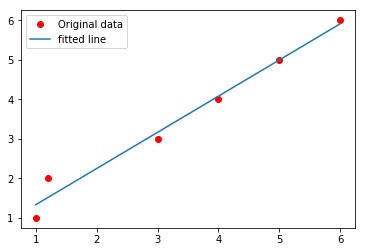

In [76]:

plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(ranX2, ranY, label='fitted line')
plt.legend()
plt.show()

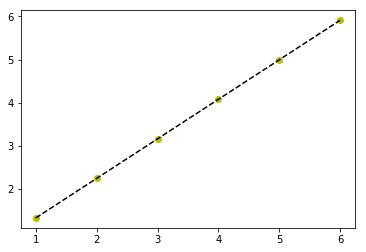

0.189414


In [77]:
#PART 2
#ROOT MEAN SQAURE ERROR
import numpy as np
import tensorflow as tf
npx=np.asarray(ranX2)
npy=np.asarray(ranY)

GraphFit=np.polyfit(npx,npy,1)
fitFunc=np.poly1d(GraphFit)

plt.plot(npx,npy,'yo',npx,fitFunc(npx),'--k')

plt.show()

with tf.name_scope("Root_mean_square_error"):
    rmse=tf.sqrt(tf.reduce_mean(tf.squared_difference(ranX,ranY)))

with tf.Session() as sess:
    print(sess.run(rmse))

